## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import time

In [2]:
pd.set_option('display.max_colwidth', None)

## Task 1: Loading the dataset

In [4]:
chatgpt_tweets = pd.read_csv("chatgpt.csv")
chatgpt_tweets.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整理付き合ってくれるのかと、\nウミガメのスープやってみたい。\nあとは調べ物してくれ。\n事務所でちょいといじったが、とりあえず色々やってみたい。,mochico0123,https://twitter.com/mochico0123/status/1617156270871699456,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/1617156291046133761,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,"[User(username='AlexandrovnaIng', id=2827059006, displayname='Alexandrovna', description=None, rawDescription=None, descriptionUrls=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, linkUrl=None, linkTcourl=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles ⬇️ auf die Piste bringt, um Euch mitzunehmen. \n\nMorgen startet @reg_schulz - und am Di um 12 besprechen wir #ChatGPT als kritische FreundInnen im Live-Briefing mit SPD-Vorsitzender @EskenSaskia &amp; Diana\nhttps://t.co/DsoeVJrPBp https://t.co/HflTruResk https://t.co/7tYCx6Srp8",ciffi,https://twitter.com/ciffi/status/1617156308926349312,https://twitter.com/ciffi,"['https://us02web.zoom.us/webinar/register/8016723032829/WN_w_ObSIzWSL2X2EEOThSbdw', 'https://twitter.com/DianaKnodel/status/1617153572654944259']","['https://t.co/DsoeVJrPBp', 'https://t.co/HflTruResk']",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>","[Photo(previewUrl='https://pbs.twimg.com/media/FnFLF3SWIAAtThd?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FnFLF3SWIAAtThd?format=jpg&name=large')]",https://twitter.com/DianaKnodel/status/1617153572654944259,"[User(username='fobizz', id=884708145792253952, displayname='fobizz', description=None, rawDescription=None, descriptionUrls=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, linkUrl=None, linkTcourl=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='DianaKnodel', id=439879932, displayname='Diana Knodel', description=None, rawDescription=None, descriptionUrls=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, linkUrl=None, linkTcourl=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='reg_schulz', id=2172945577, displayname='Regina Schulz', description=None, rawDescription=None, descriptionUrls=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, linkUrl=None, linkTcourl=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='EskenSaskia', id=1423622834, displayname='Saskia Esken', description=None, rawDescription=None, descriptionUrls=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, linkUrl=None, linkTcourl=None, profileImageUrl=None, profil

### The column names in the dataset

In [5]:
chatgpt_tweets.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Permalink', 'User',
       'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts'],
      dtype='object')

### Number of instances in the dataset

In [6]:
len(chatgpt_tweets)

50001

## Task 2: Remove all non-English tweets

In [7]:
only_english_tweets = chatgpt_tweets[chatgpt_tweets['Language'] == 'en']

In [8]:
only_english_tweets.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has been added to the honor code of my daughter’s school,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/1617156291046133761,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,"[User(username='AlexandrovnaIng', id=2827059006, displayname='Alexandrovna', description=None, rawDescription=None, descriptionUrls=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, linkUrl=None, linkTcourl=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",[],0
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi2AQ9,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/1617156332297256961,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155017638543361'],['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,https://twitter.com/agadmator/status/1617155017638543361,NaN,[],0
6,2023-01-22 13:45:03+00:00,1617156389217894400,ChatGPT runs 10K Nvidia training GPUs with potential for thousands more https://t.co/Uhq62t0Uw4,FierceElectron,https://twitter.com/FierceElectron/status/1617156389217894400,https://twitter.com/FierceElectron,['https://www.fierceelectronics.com/sensors/chatgpt-runs-10k-nvidia-training-gpus-potential-thousands-more'],['https://t.co/Uhq62t0Uw4'],0,0,0,0,1617156389217894400,en,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,NaN,NaN,[],0
7,2023-01-22 13:45:04+00:00,1617156393898745858,"@SWENGDAD There is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",xlr8harder,https://twitter.com/xlr8harder/status/1617156393898745858,https://twitter.com/xlr8harder,NaN,NaN,1,0,3,0,1617149595901104130,en,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,NaN,"[User(username='SWENGDAD', id=1460452950875193348, displayname='normie macdonald 🇺🇲', description=None, rawDescription=None, descriptionUrls=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, linkUrl=None, linkTcourl=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",[],0
8,2023-01-22 13:45:06+00:00,1617156404137295878,I created a fictional jewelry brand using ChatGPT and Midjourney.\n\nhttps://t.co/gtWdNZ0laM\n\n#ChatGPT #midjourney https://t.co/N5hlelZpTY,Kosuke_dazo,https://twitter.com/Kosuke_dazo/status/1617156404137295878,https://twitter.com/Kosuke_dazo,['https://oriori.my.canva.site/'],['https://t.co/gtWdNZ0laM'],0,1,2,1,1617156404137295878,en,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","[Photo(previewUrl='https://pbs.twimg.com/media/FnFLLMhaEAAXeSF?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FnFLLMhaEAAXeSF?format=jpg&name=large'), Photo(previewUrl='https://pbs.twimg.com/media/FnFLLMjaUAUZ_-h?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FnFLLMjaUAUZ_-h?format=jpg&name=large'), Photo(previewUrl='https://pbs.twimg.com/media/FnFLLMkaYAAa5tF?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FnFLLMkaYAAa5tF?format=jpg&name=large'), Photo(previewUrl='https://pbs.twimg.com/media/FnFLLMiacAAttvJ?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FnFLLMiacAAttvJ?format=jpg&na

In [9]:
only_english_tweets['Language'].unique()

array(['en'], dtype=object)

### Number of instances after removing non-English tweets

In [10]:
len(only_english_tweets)

32076

## Task 3: Perform basic transformations

### Convert all text from the Text column to lowercase

In [14]:
only_english_tweets.loc[:, ('Text')] = only_english_tweets.loc[:, ('Text')].str.lower()

/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [15]:
only_english_tweets[['Text']]

,Text
1,@alexandrovnaing prohibition of chatgpt has been added to the honor code of my daughter’s school
3,bow down to chatgpt 🫡..... https://t.co/entszi2aq9
6,chatgpt runs 10k nvidia training gpus with potential for thousands more https://t.co/uhq62t0uw4
7,"@swengdad there is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction."
8,i created a fictional jewelry brand using chatgpt and midjourney.\n\nhttps://t.co/gtwdnz0lam\n\n#chatgpt #midjourney https://t.co/n5hlelzpty
...,...
49991,i joined the @aipadtech x @moonsalecom exclusive giveaway for a chance to win being a part of the #aipad launch! get ready for a launch like no other!\n\ntg: https://t.co/5if0uosveq\n\n $btc $eth #ai #artificialintelligence #crypto #chatgpt #future https://t.co/kp71xazn14
49992,@iamjohnoliver i think chatgpt is taking the piss. #lastweektonight https://t.co/tvlmpntlbw
49993,digital marketers adopt new skills. artificial intelligence is completely going to capture your jobs. in a few months there will be no work for you in industry #chatgpt \n\nseo\nsmm\ncontent creators\ngraphic designer\nadvertising\nbpo/kpo\n\nabove 90% to 95% chances to drop out.
49995,remember when @twitter was down a lot in the early years cause too many people were using it. @openai is having the same problem with #chatgpt now. a shift is here.


### Separate hashtags (#) and account name (@) from the actual tweet text

In [16]:
def separate_hashtags(tweet):
    '''
    The function fetches the hashtags from the tweet
    
    Args
        tweet (string) : The tweet
        
    Returns
        hashtags_list (list) : All hashtags (strings starting with '#')
    '''
    
    hashtags_list = []
    split_tweet = tweet.split()
    
    hashtags_list = [word[1:] for word in split_tweet if word.startswith('#')]
    
    return hashtags_list 

In [17]:
def separate_account_name(tweet):
    '''
    The function fetches the account names from the tweet
    
    Args
        tweet (string) : The tweet
        
    Returns
        account_name_list (list) : All account names (strings starting with '@')
    '''
    
    account_names_list = []
    split_tweet = tweet.split()
    
    account_names_list = [word[1:] for word in split_tweet if word.startswith('@')]
    
    return account_names_list

In [18]:
only_english_tweets.loc[:, ('Hashtags')] = only_english_tweets.loc[:, ('Text')].apply(separate_hashtags)
only_english_tweets.loc[:, ('Accounts')] = only_english_tweets.loc[:, ('Text')].apply(separate_account_name)

/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [19]:
only_english_tweets[['Text', 'Hashtags', 'Accounts']]

,Text,Hashtags,Accounts
1,@alexandrovnaing prohibition of chatgpt has been added to the honor code of my daughter’s school,[],[alexandrovnaing]
3,bow down to chatgpt 🫡..... https://t.co/entszi2aq9,[],[]
6,chatgpt runs 10k nvidia training gpus with potential for thousands more https://t.co/uhq62t0uw4,[],[]
7,"@swengdad there is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.",[],[swengdad]
8,i created a fictional jewelry brand using chatgpt and midjourney.\n\nhttps://t.co/gtwdnz0lam\n\n#chatgpt #midjourney https://t.co/n5hlelzpty,"[chatgpt, midjourney]",[]
...,...,...,...
49991,i joined the @aipadtech x @moonsalecom exclusive giveaway for a chance to win being a part of the #aipad launch! get ready for a launch like no other!\n\ntg: https://t.co/5if0uosveq\n\n $btc $eth #ai #artificialintelligence #crypto #chatgpt #future https://t.co/kp71xazn14,"[aipad, ai, artificialintelligence, crypto, chatgpt, future]","[aipadtech, moonsalecom]"
49992,@iamjohnoliver i think chatgpt is taking the piss. #lastweektonight https://t.co/tvlmpntlbw,[lastweektonight],[iamjohnoliver]
49993,digital marketers adopt new skills. artificial intelligence is completely going to capture your jobs. in a few months there will be no work for you in industry #chatgpt \n\nseo\nsmm\ncontent creators\ngraphic designer\nadvertising\nbpo/kpo\n\nabove 90% to 95% chances to drop out.,[chatgpt],[]
49995,remember when @twitter was down a lot in the early years cause too many people were using it. @openai is having the same problem with #chatgpt now. a shift is here.,[chatgpt],"[twitter, openai]"


### Remove non-alphanumeric characters that appear in CleanedTweet

In [20]:
def clean_tweet(tweet):
    '''
    The function cleans the tweet by removing non-alphanumeric characters from the tweet
    
    Args
        tweet (string) : The tweet
        
    Returns
        cleaned_tweet (string) : The tweet after cleaning
    '''

    cleaned_tweet = []
    split_tweet = tweet.split()
    hash_account_removed_tweet_list = [word for word in split_tweet if not (word.startswith('#') or word.startswith('@'))]
    tweet_without_hash_accounts = ' '.join(hash_account_removed_tweet_list)
    
    for word in tweet_without_hash_accounts:
        if word.isalnum():
            cleaned_tweet.append(word)
        else:
            cleaned_tweet.append(' ')
            
    return ''.join(cleaned_tweet)

In [21]:
only_english_tweets.loc[:, ('CleanedTweet')] = only_english_tweets.loc[:, ('Text')].apply(clean_tweet)

/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [22]:
only_english_tweets[['CleanedTweet']]

,CleanedTweet
1,prohibition of chatgpt has been added to the honor code of my daughter s school
3,bow down to chatgpt https t co entszi2aq9
6,chatgpt runs 10k nvidia training gpus with potential for thousands more https t co uhq62t0uw4
7,there is repetitive work in every job there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction
8,i created a fictional jewelry brand using chatgpt and midjourney https t co gtwdnz0lam https t co n5hlelzpty
...,...
49991,i joined the x exclusive giveaway for a chance to win being a part of the launch get ready for a launch like no other tg https t co 5if0uosveq btc eth https t co kp71xazn14
49992,i think chatgpt is taking the piss https t co tvlmpntlbw
49993,digital marketers adopt new skills artificial intelligence is completely going to capture your jobs in a few months there will be no work for you in industry seo smm content creators graphic designer advertising bpo kpo above 90 to 95 chances to drop out
49995,remember when was down a lot in the early years cause too many people were using it is having the same problem with now a shift is here


#### 3 tweets before and after text processing

In [23]:
only_english_tweets.loc[3:3, ['Text', 'CleanedTweet', 'Hashtags', 'Accounts']]

,Text,CleanedTweet,Hashtags,Accounts
3,bow down to chatgpt 🫡..... https://t.co/entszi2aq9,bow down to chatgpt https t co entszi2aq9,[],[]


In [24]:
only_english_tweets.loc[42360:42360, ['Text', 'CleanedTweet', 'Hashtags', 'Accounts']]

,Text,CleanedTweet,Hashtags,Accounts
42360,@kathleenskeals now i'm going to have to use chatgpt to create awesome tweets! https://t.co/v02gubsyib,now i m going to have to use chatgpt to create awesome tweets https t co v02gubsyib,[],[kathleenskeals]


In [25]:
only_english_tweets.loc[23000:23000, ['Text', 'CleanedTweet', 'Hashtags', 'Accounts']]

,Text,CleanedTweet,Hashtags,Accounts
23000,"#chatgpt #ai ""yall ain't ready"" https://t.co/0ycgqkobrp",yall ain t ready https t co 0ycgqkobrp,"[chatgpt, ai]",[]


## Task 4: Tokenization (two approaches)

### Approach 1: Python NLTK tokenizer

In [26]:
from nltk.tokenize import word_tokenize

In [27]:
def nltk_word_tokenize(clean_tweet):
    '''
    The function performs word tokenization on the clean tweet using NLTK Basic tokenizer
    
    Args
        clean_tweet (string) : The cleaned tweet
        
    Returns
        tokenized_words (list) : The tokens from the clean tweet
    '''
    
    tokenized_words = []
    tokenized_words = nltk.word_tokenize(clean_tweet)

    return tokenized_words 

In [28]:
start = time.time()
only_english_tweets.loc[:, ('TokenizedTweetNLTK')] = only_english_tweets.loc[:, ('CleanedTweet')].apply(nltk_word_tokenize)
end = time.time()

/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [29]:
only_english_tweets[['TokenizedTweetNLTK']]

,TokenizedTweetNLTK
1,"[prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, s, school]"
3,"[bow, down, to, chatgpt, https, t, co, entszi2aq9]"
6,"[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, https, t, co, uhq62t0uw4]"
7,"[there, is, repetitive, work, in, every, job, there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, a, higher, level, of, abstraction]"
8,"[i, created, a, fictional, jewelry, brand, using, chatgpt, and, midjourney, https, t, co, gtwdnz0lam, https, t, co, n5hlelzpty]"
...,...
49991,"[i, joined, the, x, exclusive, giveaway, for, a, chance, to, win, being, a, part, of, the, launch, get, ready, for, a, launch, like, no, other, tg, https, t, co, 5if0uosveq, btc, eth, https, t, co, kp71xazn14]"
49992,"[i, think, chatgpt, is, taking, the, piss, https, t, co, tvlmpntlbw]"
49993,"[digital, marketers, adopt, new, skills, artificial, intelligence, is, completely, going, to, capture, your, jobs, in, a, few, months, there, will, be, no, work, for, you, in, industry, seo, smm, content, creators, graphic, designer, advertising, bpo, kpo, above, 90, to, 95, chances, to, drop, out]"
49995,"[remember, when, was, down, a, lot, in, the, early, years, cause, too, many, people, were, using, it, is, having, the, same, problem, with, now, a, shift, is, here]"


In [30]:
nltk_tokenization_time = end - start
nltk_tokenization_time

5.403266906738281

### Approach 2: SpaCy tokenizer

In [31]:
import spacy
nlp = spacy.blank("en")

In [32]:
def spacy_word_tokenize(clean_tweet):
    '''
    The function performs word tokenization on the clean tweet using spaCy library
    
    Args
        clean_tweet (string) : The cleaned tweet
        
    Returns
        tokenized_words (list) : The tokens from the clean tweet
    '''
    
    tokenized_words = [token for token in (nlp(clean_tweet))]

    return tokenized_words

In [33]:
start = time.time()
only_english_tweets.loc[:, ('TokenizedTweetSpacy')] = only_english_tweets.loc[:, ('CleanedTweet')].apply(spacy_word_tokenize)
end = time.time()

/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [34]:
only_english_tweets[['TokenizedTweetSpacy']]

,TokenizedTweetSpacy
1,"[prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, s, school]"
3,"[bow, down, to, chatgpt, , https, , t, co, entszi2aq9]"
6,"[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, https, , t, co, uhq62t0uw4]"
7,"[there, is, repetitive, work, in, every, job, , there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, a, higher, level, of, abstraction]"
8,"[i, created, a, fictional, jewelry, brand, using, chatgpt, and, midjourney, , https, , t, co, gtwdnz0lam, https, , t, co, n5hlelzpty]"
...,...
49991,"[i, joined, the, x, exclusive, giveaway, for, a, chance, to, win, being, a, part, of, the, launch, , get, ready, for, a, launch, like, no, other, , tg, , https, , t, co, 5if0uosveq, , btc, , eth, https, , t, co, kp71xazn14]"
49992,"[i, think, chatgpt, is, taking, the, piss, , https, , t, co, tvlmpntlbw]"
49993,"[digital, marketers, adopt, new, skills, , artificial, intelligence, is, completely, going, to, capture, your, jobs, , in, a, few, months, there, will, be, no, work, for, you, in, industry, seo, smm, content, creators, graphic, designer, advertising, bpo, kpo, above, 90, , to, 95, , chances, to, drop, out]"
49995,"[remember, when, was, down, a, lot, in, the, early, years, cause, too, many, people, were, using, it, , is, having, the, same, problem, with, now, , a, shift, is, here]"


In [35]:
spacy_tokenization_time = end - start
spacy_tokenization_time

4.648441791534424

#### Comparing Tokenization Results from NLTK and SpaCy

In [36]:
only_english_tweets.loc[3, ['Text', 'CleanedTweet', 'TokenizedTweetNLTK', 'TokenizedTweetSpacy']]

Text                                bow down to chatgpt 🫡..... https://t.co/entszi2aq9
CleanedTweet                        bow down to chatgpt        https   t co entszi2aq9
TokenizedTweetNLTK                  [bow, down, to, chatgpt, https, t, co, entszi2aq9]
TokenizedTweetSpacy    [bow, down, to, chatgpt,        , https,   , t, co, entszi2aq9]
Name: 3, dtype: object

In [37]:
only_english_tweets.loc[42360, ['Text', 'CleanedTweet', 'TokenizedTweetNLTK', 'TokenizedTweetSpacy']]

Text                         @kathleenskeals now i'm going to have to use chatgpt to create awesome tweets! https://t.co/v02gubsyib
CleanedTweet                                 now i m going to have to use chatgpt to create awesome tweets  https   t co v02gubsyib
TokenizedTweetNLTK            [now, i, m, going, to, have, to, use, chatgpt, to, create, awesome, tweets, https, t, co, v02gubsyib]
TokenizedTweetSpacy    [now, i, m, going, to, have, to, use, chatgpt, to, create, awesome, tweets,  , https,   , t, co, v02gubsyib]
Name: 42360, dtype: object

In [38]:
only_english_tweets.loc[23000, ['Text', 'CleanedTweet', 'TokenizedTweetNLTK', 'TokenizedTweetSpacy']]

Text                      #chatgpt #ai  "yall ain't ready" https://t.co/0ycgqkobrp
CleanedTweet                             yall ain t ready  https   t co 0ycgqkobrp
TokenizedTweetNLTK                 [yall, ain, t, ready, https, t, co, 0ycgqkobrp]
TokenizedTweetSpacy    [ , y, all, ain, t, ready,  , https,   , t, co, 0ycgqkobrp]
Name: 23000, dtype: object

#### Chossing SpaCy tokenizer

In [39]:
only_english_tweets.loc[:, ('TokenizedTweet')] = only_english_tweets.loc[:, ('CleanedTweet')].apply(spacy_word_tokenize)

/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [40]:
only_english_tweets[['TokenizedTweet']]

,TokenizedTweet
1,"[prohibition, of, chatgpt, has, been, added, to, the, honor, code, of, my, daughter, s, school]"
3,"[bow, down, to, chatgpt, , https, , t, co, entszi2aq9]"
6,"[chatgpt, runs, 10k, nvidia, training, gpus, with, potential, for, thousands, more, https, , t, co, uhq62t0uw4]"
7,"[there, is, repetitive, work, in, every, job, , there, are, lots, of, small, tasks, that, can, leverage, chatgpt, or, copilot, and, keep, you, working, at, a, higher, level, of, abstraction]"
8,"[i, created, a, fictional, jewelry, brand, using, chatgpt, and, midjourney, , https, , t, co, gtwdnz0lam, https, , t, co, n5hlelzpty]"
...,...
49991,"[i, joined, the, x, exclusive, giveaway, for, a, chance, to, win, being, a, part, of, the, launch, , get, ready, for, a, launch, like, no, other, , tg, , https, , t, co, 5if0uosveq, , btc, , eth, https, , t, co, kp71xazn14]"
49992,"[i, think, chatgpt, is, taking, the, piss, , https, , t, co, tvlmpntlbw]"
49993,"[digital, marketers, adopt, new, skills, , artificial, intelligence, is, completely, going, to, capture, your, jobs, , in, a, few, months, there, will, be, no, work, for, you, in, industry, seo, smm, content, creators, graphic, designer, advertising, bpo, kpo, above, 90, , to, 95, , chances, to, drop, out]"
49995,"[remember, when, was, down, a, lot, in, the, early, years, cause, too, many, people, were, using, it, , is, having, the, same, problem, with, now, , a, shift, is, here]"


## Task 5: Remove stopwords

In [41]:
from spacy.lang.en.stop_words import STOP_WORDS

In [42]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [43]:
def spacy_remove_stopwords(tokenized_tweet):
    '''
    The function performs removal of the stopwords from the tokenized tweet
    
    Args
        tokenized_tweet (string) : The tokenized tweet
        
    Returns
        stopword_removed_tweet (list) : The list of non stop words in tweet
    '''
    
    stopword_removed_tweet = ''

    non_stopwords = [token.text for token in tokenized_tweet if not token.is_stop]
    
    return non_stopwords

In [44]:
only_english_tweets.loc[:, ('StopwordRemovedTweet')] = only_english_tweets.loc[:, ('TokenizedTweet')].apply(spacy_remove_stopwords)

/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [45]:
only_english_tweets[['StopwordRemovedTweet']]

,StopwordRemovedTweet
1,"[prohibition, chatgpt, added, honor, code, daughter, s, school]"
3,"[bow, chatgpt, , https, , t, co, entszi2aq9]"
6,"[chatgpt, runs, 10k, nvidia, training, gpus, potential, thousands, https, , t, co, uhq62t0uw4]"
7,"[repetitive, work, job, , lots, small, tasks, leverage, chatgpt, copilot, working, higher, level, abstraction]"
8,"[created, fictional, jewelry, brand, chatgpt, midjourney, , https, , t, co, gtwdnz0lam, https, , t, co, n5hlelzpty]"
...,...
49991,"[joined, x, exclusive, giveaway, chance, win, launch, , ready, launch, like, , tg, , https, , t, co, 5if0uosveq, , btc, , eth, https, , t, co, kp71xazn14]"
49992,"[think, chatgpt, taking, piss, , https, , t, co, tvlmpntlbw]"
49993,"[digital, marketers, adopt, new, skills, , artificial, intelligence, completely, going, capture, jobs, , months, work, industry, seo, smm, content, creators, graphic, designer, advertising, bpo, kpo, 90, , 95, , chances, drop]"
49995,"[remember, lot, early, years, cause, people, , having, problem, , shift]"


In [46]:
only_english_tweets.loc[3:3, ['CleanedTweet', 'TokenizedTweet', 'StopwordRemovedTweet']]

,CleanedTweet,TokenizedTweet,StopwordRemovedTweet
3,bow down to chatgpt https t co entszi2aq9,"[bow, down, to, chatgpt, , https, , t, co, entszi2aq9]","[bow, chatgpt, , https, , t, co, entszi2aq9]"


In [47]:
only_english_tweets.loc[23000:23000, ['CleanedTweet', 'TokenizedTweet', 'StopwordRemovedTweet']]

,CleanedTweet,TokenizedTweet,StopwordRemovedTweet
23000,yall ain t ready https t co 0ycgqkobrp,"[ , y, all, ain, t, ready, , https, , t, co, 0ycgqkobrp]","[ , y, ain, t, ready, , https, , t, co, 0ycgqkobrp]"


In [48]:
only_english_tweets.loc[49992:49992, ['CleanedTweet', 'TokenizedTweet', 'StopwordRemovedTweet']]

,CleanedTweet,TokenizedTweet,StopwordRemovedTweet
49992,i think chatgpt is taking the piss https t co tvlmpntlbw,"[i, think, chatgpt, is, taking, the, piss, , https, , t, co, tvlmpntlbw]","[think, chatgpt, taking, piss, , https, , t, co, tvlmpntlbw]"


## SpaCy does not have a built-in stemmer, so we use Python NLTK for stemming

## Task 6: Stemming

### Approach 1: Using Python NLTK Porter Stemmer

In [49]:
from nltk.stem import PorterStemmer

In [50]:
def porter_stemming(tokenized_tweet):
    '''
    The function performs stemming of the tokenized tweet using NLTK Porter Stemmer
    
    Args
        tokenized_tweet (string) : The tokenized tweet
        
    Returns
        stemmed_tweet (list) : The tweet after stemming
    '''
    
    porter_stemmer = PorterStemmer()
    
    stemmed_tweet = [porter_stemmer.stem(token.text) for token in tokenized_tweet]
    
    return stemmed_tweet

In [51]:
start = time.time()
only_english_tweets.loc[:, ('StemmedTweet')] = only_english_tweets.loc[:, ('TokenizedTweet')].apply(porter_stemming)
end = time.time()

/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [52]:
only_english_tweets[['StemmedTweet']]

,StemmedTweet
1,"[prohibit, of, chatgpt, ha, been, ad, to, the, honor, code, of, my, daughter, s, school]"
3,"[bow, down, to, chatgpt, , http, , t, co, entszi2aq9]"
6,"[chatgpt, run, 10k, nvidia, train, gpu, with, potenti, for, thousand, more, http, , t, co, uhq62t0uw4]"
7,"[there, is, repetit, work, in, everi, job, , there, are, lot, of, small, task, that, can, leverag, chatgpt, or, copilot, and, keep, you, work, at, a, higher, level, of, abstract]"
8,"[i, creat, a, fiction, jewelri, brand, use, chatgpt, and, midjourney, , http, , t, co, gtwdnz0lam, http, , t, co, n5hlelzpti]"
...,...
49991,"[i, join, the, x, exclus, giveaway, for, a, chanc, to, win, be, a, part, of, the, launch, , get, readi, for, a, launch, like, no, other, , tg, , http, , t, co, 5if0uosveq, , btc, , eth, http, , t, co, kp71xazn14]"
49992,"[i, think, chatgpt, is, take, the, piss, , http, , t, co, tvlmpntlbw]"
49993,"[digit, market, adopt, new, skill, , artifici, intellig, is, complet, go, to, captur, your, job, , in, a, few, month, there, will, be, no, work, for, you, in, industri, seo, smm, content, creator, graphic, design, advertis, bpo, kpo, abov, 90, , to, 95, , chanc, to, drop, out]"
49995,"[rememb, when, wa, down, a, lot, in, the, earli, year, caus, too, mani, peopl, were, use, it, , is, have, the, same, problem, with, now, , a, shift, is, here]"


In [53]:
porter_stemming_time = end - start
porter_stemming_time

14.607555150985718

#### 3 examples for StemmedTweet

In [54]:
only_english_tweets.loc[3:3, ['CleanedTweet', 'TokenizedTweet', 'StemmedTweet']]

,CleanedTweet,TokenizedTweet,StemmedTweet
3,bow down to chatgpt https t co entszi2aq9,"[bow, down, to, chatgpt, , https, , t, co, entszi2aq9]","[bow, down, to, chatgpt, , http, , t, co, entszi2aq9]"


In [55]:
only_english_tweets.loc[23000:23000, ['CleanedTweet', 'TokenizedTweet', 'StemmedTweet']]

,CleanedTweet,TokenizedTweet,StemmedTweet
23000,yall ain t ready https t co 0ycgqkobrp,"[ , y, all, ain, t, ready, , https, , t, co, 0ycgqkobrp]","[ , y, all, ain, t, readi, , http, , t, co, 0ycgqkobrp]"


In [56]:
only_english_tweets.loc[42360:42360, ['CleanedTweet', 'TokenizedTweet', 'StemmedTweet']]

,CleanedTweet,TokenizedTweet,StemmedTweet
42360,now i m going to have to use chatgpt to create awesome tweets https t co v02gubsyib,"[now, i, m, going, to, have, to, use, chatgpt, to, create, awesome, tweets, , https, , t, co, v02gubsyib]","[now, i, m, go, to, have, to, use, chatgpt, to, creat, awesom, tweet, , http, , t, co, v02gubsyib]"


### Approach 2: Using Python NLTK Lancaster Stemmer

In [57]:
from nltk.stem import LancasterStemmer

In [58]:
def lancaster_stemming(tokenized_tweet):
    '''
    The function performs stemming of the tokenized tweet using NLTK Lancaster Stemmer
    
    Args
        tokenized_tweet (string) : The tokenized tweet
        
    Returns
        stemmed_tweet (list) : The tweet after stemming
    '''
    
    lancaster_stemmer = LancasterStemmer()
    
    stemmed_tweet = [lancaster_stemmer.stem(token.text) for token in tokenized_tweet]
    
    return stemmed_tweet

In [59]:
start = time.time()
only_english_tweets.loc[:, ('StemmedTweetLancaster')] = only_english_tweets.loc[:, ('TokenizedTweet')].apply(lancaster_stemming)
end = time.time()

/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [60]:
only_english_tweets[['StemmedTweetLancaster']]

,StemmedTweetLancaster
1,"[prohibit, of, chatgpt, has, been, ad, to, the, hon, cod, of, my, daught, s, school]"
3,"[bow, down, to, chatgpt, , https, , t, co, entszi2aq9]"
6,"[chatgpt, run, 10k, nvid, train, gpu, with, pot, for, thousand, mor, https, , t, co, uhq62t0uw4]"
7,"[ther, is, repetit, work, in, every, job, , ther, ar, lot, of, smal, task, that, can, lev, chatgpt, or, copilot, and, keep, you, work, at, a, high, level, of, abstract]"
8,"[i, cre, a, fict, jewelry, brand, us, chatgpt, and, midjourney, , https, , t, co, gtwdnz0lam, https, , t, co, n5hlelzpty]"
...,...
49991,"[i, join, the, x, exclud, giveaway, for, a, chant, to, win, being, a, part, of, the, launch, , get, ready, for, a, launch, lik, no, oth, , tg, , https, , t, co, 5if0uosveq, , btc, , eth, https, , t, co, kp71xazn14]"
49992,"[i, think, chatgpt, is, tak, the, piss, , https, , t, co, tvlmpntlbw]"
49993,"[digit, market, adopt, new, skil, , art, intellig, is, complet, going, to, capt, yo, job, , in, a, few, month, ther, wil, be, no, work, for, you, in, industry, seo, smm, cont, cre, graph, design, advert, bpo, kpo, abov, 90, , to, 95, , chant, to, drop, out]"
49995,"[rememb, when, was, down, a, lot, in, the, ear, year, caus, too, many, peopl, wer, us, it, , is, hav, the, sam, problem, with, now, , a, shift, is, her]"


In [61]:
lancaster_stemming_time = end - start
lancaster_stemming_time

13.627206802368164

#### 3 examples

In [62]:
only_english_tweets.loc[3:3, ['CleanedTweet', 'TokenizedTweet', 'StemmedTweetLancaster']]

,CleanedTweet,TokenizedTweet,StemmedTweetLancaster
3,bow down to chatgpt https t co entszi2aq9,"[bow, down, to, chatgpt, , https, , t, co, entszi2aq9]","[bow, down, to, chatgpt, , https, , t, co, entszi2aq9]"


In [63]:
only_english_tweets.loc[42360:42360, ['CleanedTweet', 'TokenizedTweet', 'StemmedTweetLancaster']]

,CleanedTweet,TokenizedTweet,StemmedTweetLancaster
42360,now i m going to have to use chatgpt to create awesome tweets https t co v02gubsyib,"[now, i, m, going, to, have, to, use, chatgpt, to, create, awesome, tweets, , https, , t, co, v02gubsyib]","[now, i, m, going, to, hav, to, us, chatgpt, to, cre, awesom, tweet, , https, , t, co, v02gubsyib]"


In [64]:
only_english_tweets.loc[23000:23000, ['CleanedTweet', 'TokenizedTweet', 'StemmedTweetLancaster']]

,CleanedTweet,TokenizedTweet,StemmedTweetLancaster
23000,yall ain t ready https t co 0ycgqkobrp,"[ , y, all, ain, t, ready, , https, , t, co, 0ycgqkobrp]","[ , y, al, ain, t, ready, , https, , t, co, 0ycgqkobrp]"


#### Comparison of NLTK Porter and Lancaster Stemming

In [65]:
only_english_tweets.loc[42360:42360, ['TokenizedTweet', 'StemmedTweet', 'StemmedTweetLancaster']]

,TokenizedTweet,StemmedTweet,StemmedTweetLancaster
42360,"[now, i, m, going, to, have, to, use, chatgpt, to, create, awesome, tweets, , https, , t, co, v02gubsyib]","[now, i, m, go, to, have, to, use, chatgpt, to, creat, awesom, tweet, , http, , t, co, v02gubsyib]","[now, i, m, going, to, hav, to, us, chatgpt, to, cre, awesom, tweet, , https, , t, co, v02gubsyib]"


## Additional pre-processing steps:

### Sentence Segmentation:

In [66]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shrey_shah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
from nltk import tokenize

In [68]:
def sentence_segmentation(text):
    '''
    The function performs sentence segmentation of the raw tweet text
    
    Args
        text (string) : The raw tweet
        
    Returns
        sentence_segments (list) : The list of sentences in tweet
    '''
    
    sentence_segments = tokenize.sent_tokenize(text)
    
    return sentence_segments

In [69]:
only_english_tweets.loc[:, ('SentenceSegmentedTweet')] = only_english_tweets.loc[:, ('Text')].apply(sentence_segmentation)

/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [70]:
only_english_tweets[['Text', 'SentenceSegmentedTweet']]

,Text,SentenceSegmentedTweet
1,@alexandrovnaing prohibition of chatgpt has been added to the honor code of my daughter’s school,[@alexandrovnaing prohibition of chatgpt has been added to the honor code of my daughter’s school]
3,bow down to chatgpt 🫡..... https://t.co/entszi2aq9,[bow down to chatgpt 🫡..... https://t.co/entszi2aq9]
6,chatgpt runs 10k nvidia training gpus with potential for thousands more https://t.co/uhq62t0uw4,[chatgpt runs 10k nvidia training gpus with potential for thousands more https://t.co/uhq62t0uw4]
7,"@swengdad there is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.","[@swengdad there is repetitive work in every job, there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction.]"
8,i created a fictional jewelry brand using chatgpt and midjourney.\n\nhttps://t.co/gtwdnz0lam\n\n#chatgpt #midjourney https://t.co/n5hlelzpty,"[i created a fictional jewelry brand using chatgpt and midjourney., https://t.co/gtwdnz0lam\n\n#chatgpt #midjourney https://t.co/n5hlelzpty]"
...,...,...
49991,i joined the @aipadtech x @moonsalecom exclusive giveaway for a chance to win being a part of the #aipad launch! get ready for a launch like no other!\n\ntg: https://t.co/5if0uosveq\n\n $btc $eth #ai #artificialintelligence #crypto #chatgpt #future https://t.co/kp71xazn14,"[i joined the @aipadtech x @moonsalecom exclusive giveaway for a chance to win being a part of the #aipad launch!, get ready for a launch like no other!, tg: https://t.co/5if0uosveq\n\n $btc $eth #ai #artificialintelligence #crypto #chatgpt #future https://t.co/kp71xazn14]"
49992,@iamjohnoliver i think chatgpt is taking the piss. #lastweektonight https://t.co/tvlmpntlbw,"[@iamjohnoliver i think chatgpt is taking the piss., #lastweektonight https://t.co/tvlmpntlbw]"
49993,digital marketers adopt new skills. artificial intelligence is completely going to capture your jobs. in a few months there will be no work for you in industry #chatgpt \n\nseo\nsmm\ncontent creators\ngraphic designer\nadvertising\nbpo/kpo\n\nabove 90% to 95% chances to drop out.,"[digital marketers adopt new skills., artificial intelligence is completely going to capture your jobs., in a few months there will be no work for you in industry #chatgpt \n\nseo\nsmm\ncontent creators\ngraphic designer\nadvertising\nbpo/kpo\n\nabove 90% to 95% chances to drop out.]"
49995,remember when @twitter was down a lot in the early years cause too many people were using it. @openai is having the same problem with #chatgpt now. a shift is here.,"[remember when @twitter was down a lot in the early years cause too many people were using it., @openai is having the same problem with #chatgpt now., a shift is here.]"


In [71]:
only_english_tweets.loc[49993:49995, ['Text', 'SentenceSegmentedTweet']]

,Text,SentenceSegmentedTweet
49993,digital marketers adopt new skills. artificial intelligence is completely going to capture your jobs. in a few months there will be no work for you in industry #chatgpt \n\nseo\nsmm\ncontent creators\ngraphic designer\nadvertising\nbpo/kpo\n\nabove 90% to 95% chances to drop out.,"[digital marketers adopt new skills., artificial intelligence is completely going to capture your jobs., in a few months there will be no work for you in industry #chatgpt \n\nseo\nsmm\ncontent creators\ngraphic designer\nadvertising\nbpo/kpo\n\nabove 90% to 95% chances to drop out.]"
49995,remember when @twitter was down a lot in the early years cause too many people were using it. @openai is having the same problem with #chatgpt now. a shift is here.,"[remember when @twitter was down a lot in the early years cause too many people were using it., @openai is having the same problem with #chatgpt now., a shift is here.]"


### Removal of HTML Tags

In [72]:
import re

In [73]:
def remove_html_tags(cleaned_tweet):
    '''
    The function performs removal of HTML tags from cleaned tweet if they exist
    
    Args
        cleaned_tweet (string) : The cleaned tweet
        
    Returns
        tweet_without_html_tags (list) : The tweet after removal of HTML tags
    '''
    
    tweet_without_html_tags = re.sub(r'<.*?>', '', cleaned_tweet)
    
    return tweet_without_html_tags

In [74]:
only_english_tweets.loc[:, ('TweetWithoutHTMLTags')] = only_english_tweets.loc[:, ('CleanedTweet')].apply(remove_html_tags)

/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [75]:
only_english_tweets[['TweetWithoutHTMLTags']]

,TweetWithoutHTMLTags
1,prohibition of chatgpt has been added to the honor code of my daughter s school
3,bow down to chatgpt https t co entszi2aq9
6,chatgpt runs 10k nvidia training gpus with potential for thousands more https t co uhq62t0uw4
7,there is repetitive work in every job there are lots of small tasks that can leverage chatgpt or copilot and keep you working at a higher level of abstraction
8,i created a fictional jewelry brand using chatgpt and midjourney https t co gtwdnz0lam https t co n5hlelzpty
...,...
49991,i joined the x exclusive giveaway for a chance to win being a part of the launch get ready for a launch like no other tg https t co 5if0uosveq btc eth https t co kp71xazn14
49992,i think chatgpt is taking the piss https t co tvlmpntlbw
49993,digital marketers adopt new skills artificial intelligence is completely going to capture your jobs in a few months there will be no work for you in industry seo smm content creators graphic designer advertising bpo kpo above 90 to 95 chances to drop out
49995,remember when was down a lot in the early years cause too many people were using it is having the same problem with now a shift is here


In [76]:
only_english_tweets.loc[:, ('SourceWithoutHTML')] = only_english_tweets.loc[:, ('Source')].apply(remove_html_tags) 

/opt/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [77]:
only_english_tweets[['Source', 'SourceWithoutHTML']]

,Source,SourceWithoutHTML
1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Twitter for iPhone
3,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Twitter for Android
6,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Twitter Web App
7,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Twitter Web App
8,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Twitter for iPhone
...,...,...
49991,"<a href=""https://www.viralsweep.com/"" rel=""nofollow"">ViralSweep App</a>",ViralSweep App
49992,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Twitter Web App
49993,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Twitter for Android
49995,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Twitter for iPhone


# Dataset Observation

### Descriptive statistics

In [78]:
chatgpt_tweets.describe()

,Tweet Id,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,hastag_counts
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,5.000100e+04,50001.000000
mean,1.617493e+18,0.929141,1.498510,9.696326,0.219536,1.617205e+18,0.783304
std,1.725682e+14,23.251710,46.030058,313.524215,10.356329,1.005075e+16,1.975040
min,1.617156e+18,0.000000,0.000000,0.000000,0.000000,6.493609e+17,0.000000
25%,1.617354e+18,0.000000,0.000000,0.000000,0.000000,1.617302e+18,0.000000
50%,1.617525e+18,0.000000,0.000000,0.000000,0.000000,1.617504e+18,0.000000
75%,1.617625e+18,1.000000,0.000000,2.000000,0.000000,1.617607e+18,1.000000
max,1.617779e+18,3098.000000,6815.000000,56073.000000,1947.000000,1.617779e+18,28.000000


In [79]:
chatgpt_tweets.astype('object').describe()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
count,50001,50001,50001,50001,50001,50001,19942,19942,50001,50001,50001,50001,50001,50001,50001,9502,3563,17169,50001,50001
unique,41559,50001,49555,38433,50001,38433,13769,19485,108,138,366,51,41430,61,843,9401,2040,10704,7312,27
top,2023-01-23 17:11:13+00:00,1617156270871699456,@chatgpt_issac AI,translation_ja,https://twitter.com/mochico0123/status/1617156270871699456,https://twitter.com/translation_ja,['https://www.ft.com/content/7229ba86-142a-49f6-9821-f55c07536b7c'],['https://t.co/xegxY3jDom'],0,0,0,0,1617162355112124421,en,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>","[Photo(previewUrl='https://pbs.twimg.com/media/FnIci-9WAAAHGyY?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FnIci-9WAAAHGyY?format=jpg&name=large')]",https://twitter.com/GRDecter/status/1617162355112124421,"[User(username='GRDecter', id=1281457267582177280, displayname='Genevieve Roch-Decter, CFA', description=None, rawDescription=None, descriptionUrls=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, linkUrl=None, linkTcourl=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",[],0
freq,8,1,164,60,1,60,149,19,36736,42416,27141,47665,264,32076,17814,20,209,332,36414,36414


### Duplicate tweets

In [80]:
chatgpt_tweets[chatgpt_tweets.duplicated()]

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts


### Minimum, maximum and average document length

In [81]:
maximum_doc_length = only_english_tweets['Text'].str.len().max()
maximum_doc_length

826

In [82]:
minimum_doc_length = only_english_tweets['Text'].str.len().min()
minimum_doc_length

7

In [83]:
average_doc_length = only_english_tweets['Text'].str.len().mean()
average_doc_length

148.71480234443197

### Visualizing text tweet column

In [84]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

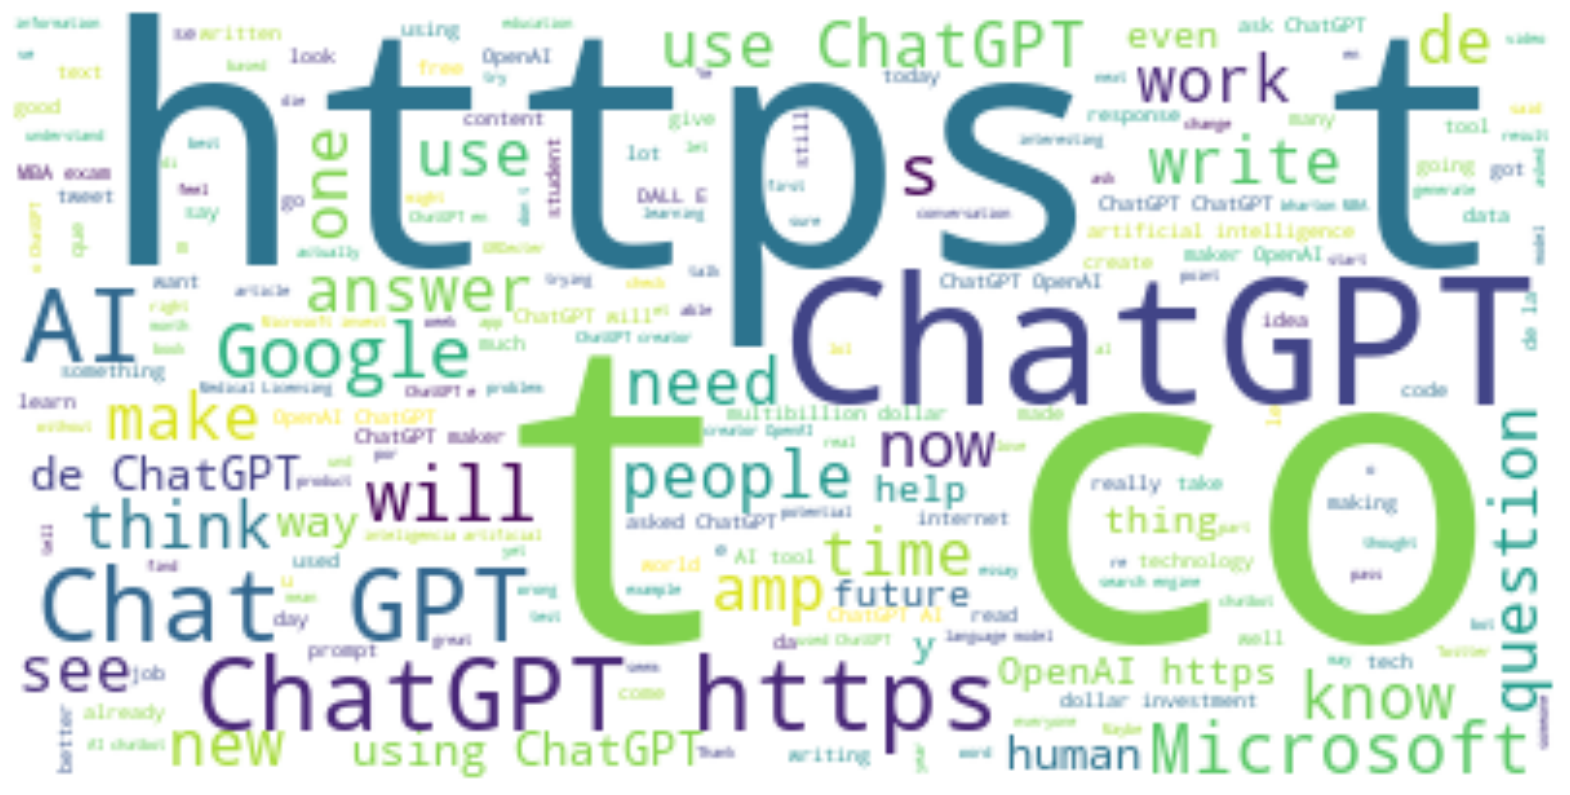

In [85]:
text = " ".join(str(i) for i in chatgpt_tweets['Text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()